In [43]:
import sympy
from sympy import *
import matplotlib.pyplot as plt
import scipy.integrate
import numpy

In [4]:
n, k = symbols("n, k", integer=True, positive=True)

Uu, Psi_theta_theta = symbols('Uu, Psi_theta_theta', real=True, positive=True)

h, hT, Rk = symbols('h, hT, Rk', real=True, positive=True)

#s,t=var('s, t')
#f = t^5*exp(t)*sin(t)
cr,ps,mR,omega,dr,Ir,Texte,msT,d,cUo,Vo,Omega= symbols('cr, ps, mR, omega, dr, Ir, Texte, msT, d, cUo, Vo, Omega', 
                                                       real=True, positive=True)

Omega = omega

theta, tau = symbols('theta, tau')

#qk = symbols('qk', cls=Function)
qk = Function('qk')(tau)
pk = Function('pk')(tau)

#f = (x^2 + sin(a*w)).function(a,x,w); f

u = (cos(n* theta) * qk + pk *sin(n *theta))* Uu
#u = ((cos(n* theta) * qk + pk *sin(n *theta))* Uu).function(theta)
ak = Function('ak')(tau)

zr = u .subs(theta, ak) 
#zr = u(ak)
du = diff(u,tau)    # D[u, τ];

dzr = du.subs(theta, ak)   # /. {θ -> αk[τ]};
#dzr = du(ak,qk,pk)
ddzr = diff(dzr,tau)   #D[dzr, τ]

v = - (h/2 + hT)* Psi_theta_theta * (cos(n*theta)*pk + sin(n*theta)*qk) 
dv = diff(v, tau)   ##dv = D[%, τ];

#aft= dv.coefficient(diff(qk(tau),tau))

#f.coefficient(sin(y))




In [3]:
type(d)

sympy.core.symbol.Symbol

In [4]:
dv.coeff(Derivative(qk,tau)) 

0

In [5]:
#qk = symbols('qk', cls=Function)
qk = Function('qk')(tau)
pk = Function('pk')(tau)

#f = (x^2 + sin(a*w)).function(a,x,w); f

u = (cos(n* theta) * qk + pk *sin(n *theta))* Uu
#u = ((cos(n* theta) * qk + pk *sin(n *theta))* Uu).function(theta)
ak = Function('ak')(tau)

zr = u .subs(theta, ak) 
#zr = u(ak)
du = diff(u,tau)    # D[u, τ];

dzr = du.subs(theta, ak)   # /. {θ -> αk[τ]};
#dzr = du(ak,qk,pk)
ddzr = diff(dzr,tau)   #D[dzr, τ]

v = - (h/2 + hT)* Psi_theta_theta * (cos(n*theta)*pk + sin(n*theta)*qk) 
dv = diff(v, tau)   ##dv = D[%, τ];
print(dv)

dvqk = diff(dv, Derivative(Function('qk')(tau), tau)).subs(theta, ak)
#dvqk = diff(dv, Derivative(Function('qk')(Symbol('tau')), Symbol('tau'))).subs(theta, ak)  #D[dv, qk '[τ]] /. {θ -> αk[τ]}
print(dvqk)
dvpk = diff(dv, Derivative(Function('pk')(tau), tau)).subs(theta, ak)   #D[dv, pk '[τ]] /. {θ -> αk[τ]}
print(dvpk)
duqk = diff(du, Derivative(Function('qk')(tau), tau)).subs(theta, ak)   #D[du, qk '[τ]] /. {θ -> αk[τ]}
print(duqk)
dupk = diff(du, Derivative(Function('pk')(tau), tau)).subs(theta, ak)   ###D[du, pk '[τ]] /. {θ -> αk[τ]}
print(dupk)

Psi_theta_theta*(-h/2 - hT)*(sin(n*theta)*Derivative(qk(tau), tau) + cos(n*theta)*Derivative(pk(tau), tau))
Psi_theta_theta*(-h/2 - hT)*sin(n*ak(tau))
Psi_theta_theta*(-h/2 - hT)*cos(n*ak(tau))
Uu*cos(n*ak(tau))
Uu*sin(n*ak(tau))


In [6]:
dphir = (dv/Rk).subs(theta, ak)

ddv = diff(dv, tau) ###D[dv, τ];

ddphir = diff(dphir, tau)

In [7]:
zr = zr.subs({sin(n*Function('ak')(tau)): Function('pk')(tau)/sqrt(Function('pk')(tau)**2 + Function('qk')(tau)**2),cos(n*Function('ak')(tau)): Function('qk')(tau)/sqrt(Function('pk')(tau)**2 + Function('qk')(tau)**2)})
dzr=dzr.subs({sin(n*Function('ak')(tau)): Function('pk')(tau)/sqrt(Function('pk')(tau)**2 + Function('qk')(tau)**2),cos(n*Function('ak')(tau)): Function('qk')(tau)/sqrt(Function('pk')(tau)**2 + Function('qk')(tau)**2)})
ddzr=ddzr.subs({sin(n*Function('ak')(tau)): Function('pk')(tau)/sqrt(Function('pk')(tau)**2 + Function('qk')(tau)**2),cos(n*Function('ak')(tau)): Function('qk')(tau)/sqrt(Function('pk')(tau)**2 + Function('qk')(tau)**2)})
dvqk=dvqk.subs({sin(n*Function('ak')(tau)): Function('pk')(tau)/sqrt(Function('pk')(tau)**2 + Function('qk')(tau)**2),cos(n*Function('ak')(tau)): Function('qk')(tau)/sqrt(Function('pk')(tau)**2 + Function('qk')(tau)**2)})
dvpk=dvpk.subs({sin(n*Function('ak')(tau)): Function('pk')(tau)/sqrt(Function('pk')(tau)**2 + Function('qk')(tau)**2),cos(n*Function('ak')(tau)): Function('qk')(tau)/sqrt(Function('pk')(tau)**2 + Function('qk')(tau)**2)})
duqk=duqk.subs({sin(n*Function('ak')(tau)): Function('pk')(tau)/sqrt(Function('pk')(tau)**2 + Function('qk')(tau)**2),cos(n*Function('ak')(tau)): Function('qk')(tau)/sqrt(Function('pk')(tau)**2 + Function('qk')(tau)**2)})
dupk=dupk.subs({sin(n*Function('ak')(tau)): Function('pk')(tau)/sqrt(Function('pk')(tau)**2 + Function('qk')(tau)**2),cos(n*Function('ak')(tau)): Function('qk')(tau)/sqrt(Function('pk')(tau)**2 + Function('qk')(tau)**2)})
dphir=dphir.subs({sin(n*Function('ak')(tau)): Function('pk')(tau)/sqrt(Function('pk')(tau)**2 + Function('qk')(tau)**2),cos(n*Function('ak')(tau)): Function('qk')(tau)/sqrt(Function('pk')(tau)**2 + Function('qk')(tau)**2)})
ddphir=ddphir.subs({sin(n*Function('ak')(tau)): Function('pk')(tau)/sqrt(Function('pk')(tau)**2 + Function('qk')(tau)**2),cos(n*Function('ak')(tau)): Function('qk')(tau)/sqrt(Function('pk')(tau)**2 + Function('qk')(tau)**2)})
print(ddphir)

Psi_theta_theta*(-h/2 - hT)*(-n*pk(tau)*Derivative(ak(tau), tau)*Derivative(pk(tau), tau)/sqrt(pk(tau)**2 + qk(tau)**2) + n*qk(tau)*Derivative(ak(tau), tau)*Derivative(qk(tau), tau)/sqrt(pk(tau)**2 + qk(tau)**2) + pk(tau)*Derivative(qk(tau), (tau, 2))/sqrt(pk(tau)**2 + qk(tau)**2) + qk(tau)*Derivative(pk(tau), (tau, 2))/sqrt(pk(tau)**2 + qk(tau)**2))/Rk


In [8]:
print(zr)
zr=zr.factor()
dzr=dzr.factor()
ddzr=ddzr.factor()
dvqk=dvqk.factor()
dvpk=dvpk.factor()
duqk=duqk.factor()
dupk=dupk.factor()
dphir=dphir.factor()
print(ddphir)
ddphir=ddphir.factor()
print(ddphir)

Uu*(pk(tau)**2/sqrt(pk(tau)**2 + qk(tau)**2) + qk(tau)**2/sqrt(pk(tau)**2 + qk(tau)**2))
Psi_theta_theta*(-h/2 - hT)*(-n*pk(tau)*Derivative(ak(tau), tau)*Derivative(pk(tau), tau)/sqrt(pk(tau)**2 + qk(tau)**2) + n*qk(tau)*Derivative(ak(tau), tau)*Derivative(qk(tau), tau)/sqrt(pk(tau)**2 + qk(tau)**2) + pk(tau)*Derivative(qk(tau), (tau, 2))/sqrt(pk(tau)**2 + qk(tau)**2) + qk(tau)*Derivative(pk(tau), (tau, 2))/sqrt(pk(tau)**2 + qk(tau)**2))/Rk
Psi_theta_theta*(h + 2*hT)*(n*pk(tau)*Derivative(ak(tau), tau)*Derivative(pk(tau), tau) - n*qk(tau)*Derivative(ak(tau), tau)*Derivative(qk(tau), tau) - pk(tau)*Derivative(qk(tau), (tau, 2)) - qk(tau)*Derivative(pk(tau), (tau, 2)))/(2*Rk*sqrt(pk(tau)**2 + qk(tau)**2))


In [9]:
ddzr=ddzr.subs(Derivative(Function('ak')(tau),tau), (Function('qk')(tau)*Derivative(Function('pk')(tau),tau)-Function('pk')(tau)*Derivative(Function('qk')(tau),tau))/(n*(Function('pk')(tau)**2+Function('qk')(tau)**2  )) )

ddphir=ddphir.subs(Derivative(Function('ak')(tau),tau), (Function('qk')(tau)*Derivative(Function('pk')(tau),tau)-Function('pk')(tau)*Derivative(Function('qk')(tau),tau))/(n*(Function('pk')(tau)**2+Function('qk')(tau)**2  )) )

In [9]:
print(ddphir)

Psi_theta_theta*(h + 2*hT)*((-pk(tau)*Derivative(qk(tau), tau) + qk(tau)*Derivative(pk(tau), tau))*pk(tau)*Derivative(pk(tau), tau)/(pk(tau)**2 + qk(tau)**2) - (-pk(tau)*Derivative(qk(tau), tau) + qk(tau)*Derivative(pk(tau), tau))*qk(tau)*Derivative(qk(tau), tau)/(pk(tau)**2 + qk(tau)**2) - pk(tau)*Derivative(qk(tau), (tau, 2)) - qk(tau)*Derivative(pk(tau), (tau, 2)))/(2*Rk*sqrt(pk(tau)**2 + qk(tau)**2))


In [10]:
ddphir.factor()

-Psi_theta_theta*(h + 2*hT)*(pk(tau)**3*Derivative(qk(tau), (tau, 2)) + pk(tau)**2*qk(tau)*Derivative(pk(tau), (tau, 2)) + pk(tau)**2*Derivative(pk(tau), tau)*Derivative(qk(tau), tau) + pk(tau)*qk(tau)**2*Derivative(qk(tau), (tau, 2)) - pk(tau)*qk(tau)*Derivative(pk(tau), tau)**2 - pk(tau)*qk(tau)*Derivative(qk(tau), tau)**2 + qk(tau)**3*Derivative(pk(tau), (tau, 2)) + qk(tau)**2*Derivative(pk(tau), tau)*Derivative(qk(tau), tau))/(2*Rk*(pk(tau)**2 + qk(tau)**2)**(3/2))

In [11]:
dphir

-Psi_theta_theta*(h + 2*hT)*(pk(tau)*Derivative(qk(tau), tau) + qk(tau)*Derivative(pk(tau), tau))/(2*Rk*sqrt(pk(tau)**2 + qk(tau)**2))

In [12]:
Fv = cr*ps
#FN = (1/n)*(mR*omega**2*ddzr + omega*dr*dzr + cr*zr + Fv)
FN = (1/n)*(mR*omega**2*ddzr + cr*zr + Fv)       #dr = 0
#FC = (1/n)*(Ir*omega**2*ddphir + drot*omega*dphir  + Texte)/Rk
FC = (1/n)*(Ir*omega**2*ddphir + Texte)/Rk
eq1 = -diff(pk,tau,2)-(1/(msT*omega))*d*diff(pk,tau)-pk-(1/(msT*omega**2))*cUo*Vo*sin(Omega*tau/omega)+(n/(msT*omega**2))*(-FN*dupk-FC*dvpk)
eq2 = -diff(qk,tau,2)-(1/(msT*omega))*d*diff(qk,tau)-qk-(1/(msT*omega**2))*cUo*Vo*cos(Omega*tau/omega)+(n/(msT*omega**2))*(-FN*duqk-FC*dvqk)

In [14]:
print(eq1)
#print(eq1.factor())

-Vo*cUo*sin(tau)/(msT*omega**2) - d*Derivative(pk(tau), tau)/(msT*omega) - pk(tau) - Derivative(pk(tau), (tau, 2)) + n*(Psi_theta_theta*(h + 2*hT)*(Ir*Psi_theta_theta*omega**2*(h + 2*hT)*((-pk(tau)*Derivative(qk(tau), tau) + qk(tau)*Derivative(pk(tau), tau))*pk(tau)*Derivative(pk(tau), tau)/(pk(tau)**2 + qk(tau)**2) - (-pk(tau)*Derivative(qk(tau), tau) + qk(tau)*Derivative(pk(tau), tau))*qk(tau)*Derivative(qk(tau), tau)/(pk(tau)**2 + qk(tau)**2) - pk(tau)*Derivative(qk(tau), (tau, 2)) - qk(tau)*Derivative(pk(tau), (tau, 2)))/(2*Rk*sqrt(pk(tau)**2 + qk(tau)**2)) + Texte)*qk(tau)/(2*Rk*n*sqrt(pk(tau)**2 + qk(tau)**2)) - Uu*(Uu*cr*sqrt(pk(tau)**2 + qk(tau)**2) + Uu*mR*omega**2*(-(-pk(tau)*Derivative(qk(tau), tau) + qk(tau)*Derivative(pk(tau), tau))*pk(tau)*Derivative(qk(tau), tau)/(pk(tau)**2 + qk(tau)**2) + (-pk(tau)*Derivative(qk(tau), tau) + qk(tau)*Derivative(pk(tau), tau))*qk(tau)*Derivative(pk(tau), tau)/(pk(tau)**2 + qk(tau)**2) + pk(tau)*Derivative(pk(tau), (tau, 2)) + qk(tau)*Der

In [13]:
eq2

-Vo*cUo*cos(tau)/(msT*omega**2) - d*Derivative(qk(tau), tau)/(msT*omega) - qk(tau) - Derivative(qk(tau), (tau, 2)) + n*(Psi_theta_theta*(h + 2*hT)*(Ir*Psi_theta_theta*omega**2*(h + 2*hT)*((-pk(tau)*Derivative(qk(tau), tau) + qk(tau)*Derivative(pk(tau), tau))*pk(tau)*Derivative(pk(tau), tau)/(pk(tau)**2 + qk(tau)**2) - (-pk(tau)*Derivative(qk(tau), tau) + qk(tau)*Derivative(pk(tau), tau))*qk(tau)*Derivative(qk(tau), tau)/(pk(tau)**2 + qk(tau)**2) - pk(tau)*Derivative(qk(tau), (tau, 2)) - qk(tau)*Derivative(pk(tau), (tau, 2)))/(2*Rk*sqrt(pk(tau)**2 + qk(tau)**2)) + Texte)*pk(tau)/(2*Rk*n*sqrt(pk(tau)**2 + qk(tau)**2)) - Uu*(Uu*cr*sqrt(pk(tau)**2 + qk(tau)**2) + Uu*mR*omega**2*(-(-pk(tau)*Derivative(qk(tau), tau) + qk(tau)*Derivative(pk(tau), tau))*pk(tau)*Derivative(qk(tau), tau)/(pk(tau)**2 + qk(tau)**2) + (-pk(tau)*Derivative(qk(tau), tau) + qk(tau)*Derivative(pk(tau), tau))*qk(tau)*Derivative(pk(tau), tau)/(pk(tau)**2 + qk(tau)**2) + pk(tau)*Derivative(pk(tau), (tau, 2)) + qk(tau)*Der

In [14]:
DIFF2Q , DIFF2P= symbols('DIFF2Q, DIFF2P')
eq1sss = eq1.subs({Derivative(qk,tau,tau) : DIFF2Q, Derivative(pk,tau,tau):DIFF2P})
eq2sss = eq2.subs({Derivative(qk,tau,tau) : DIFF2Q, Derivative(pk,tau,tau):DIFF2P})

In [15]:
solution= solve([eq1sss , eq2sss],[DIFF2Q , DIFF2P])

In [18]:
solution

{DIFF2Q: (Ir*Psi_theta_theta**2*Uu**2*cr*h**2*pk(tau)**6*qk(tau) + Ir*Psi_theta_theta**2*Uu**2*cr*h**2*pk(tau)**4*qk(tau)**3 - Ir*Psi_theta_theta**2*Uu**2*cr*h**2*pk(tau)**2*qk(tau)**5 - Ir*Psi_theta_theta**2*Uu**2*cr*h**2*qk(tau)**7 + 4*Ir*Psi_theta_theta**2*Uu**2*cr*h*hT*pk(tau)**6*qk(tau) + 4*Ir*Psi_theta_theta**2*Uu**2*cr*h*hT*pk(tau)**4*qk(tau)**3 - 4*Ir*Psi_theta_theta**2*Uu**2*cr*h*hT*pk(tau)**2*qk(tau)**5 - 4*Ir*Psi_theta_theta**2*Uu**2*cr*h*hT*qk(tau)**7 + 4*Ir*Psi_theta_theta**2*Uu**2*cr*hT**2*pk(tau)**6*qk(tau) + 4*Ir*Psi_theta_theta**2*Uu**2*cr*hT**2*pk(tau)**4*qk(tau)**3 - 4*Ir*Psi_theta_theta**2*Uu**2*cr*hT**2*pk(tau)**2*qk(tau)**5 - 4*Ir*Psi_theta_theta**2*Uu**2*cr*hT**2*qk(tau)**7 - Ir*Psi_theta_theta**2*Uu**2*h**2*mR*omega**2*pk(tau)**5*Derivative(pk(tau), tau)*Derivative(qk(tau), tau) + Ir*Psi_theta_theta**2*Uu**2*h**2*mR*omega**2*pk(tau)**4*qk(tau)*Derivative(pk(tau), tau)**2 + 2*Ir*Psi_theta_theta**2*Uu**2*h**2*mR*omega**2*pk(tau)**4*qk(tau)*Derivative(qk(tau), tau)

In [20]:
len(solution)

2

In [21]:
type(solution)

dict

In [22]:
solution[DIFF2Q]

(Ir*Psi_theta_theta**2*Uu**2*cr*h**2*pk(tau)**6*qk(tau) + Ir*Psi_theta_theta**2*Uu**2*cr*h**2*pk(tau)**4*qk(tau)**3 - Ir*Psi_theta_theta**2*Uu**2*cr*h**2*pk(tau)**2*qk(tau)**5 - Ir*Psi_theta_theta**2*Uu**2*cr*h**2*qk(tau)**7 + 4*Ir*Psi_theta_theta**2*Uu**2*cr*h*hT*pk(tau)**6*qk(tau) + 4*Ir*Psi_theta_theta**2*Uu**2*cr*h*hT*pk(tau)**4*qk(tau)**3 - 4*Ir*Psi_theta_theta**2*Uu**2*cr*h*hT*pk(tau)**2*qk(tau)**5 - 4*Ir*Psi_theta_theta**2*Uu**2*cr*h*hT*qk(tau)**7 + 4*Ir*Psi_theta_theta**2*Uu**2*cr*hT**2*pk(tau)**6*qk(tau) + 4*Ir*Psi_theta_theta**2*Uu**2*cr*hT**2*pk(tau)**4*qk(tau)**3 - 4*Ir*Psi_theta_theta**2*Uu**2*cr*hT**2*pk(tau)**2*qk(tau)**5 - 4*Ir*Psi_theta_theta**2*Uu**2*cr*hT**2*qk(tau)**7 - Ir*Psi_theta_theta**2*Uu**2*h**2*mR*omega**2*pk(tau)**5*Derivative(pk(tau), tau)*Derivative(qk(tau), tau) + Ir*Psi_theta_theta**2*Uu**2*h**2*mR*omega**2*pk(tau)**4*qk(tau)*Derivative(pk(tau), tau)**2 + 2*Ir*Psi_theta_theta**2*Uu**2*h**2*mR*omega**2*pk(tau)**4*qk(tau)*Derivative(qk(tau), tau)**2 - 2*I

In [23]:
solution[DIFF2P]

(-Ir*Psi_theta_theta**2*Uu**2*cr*h**2*pk(tau)**7 - Ir*Psi_theta_theta**2*Uu**2*cr*h**2*pk(tau)**5*qk(tau)**2 + Ir*Psi_theta_theta**2*Uu**2*cr*h**2*pk(tau)**3*qk(tau)**4 + Ir*Psi_theta_theta**2*Uu**2*cr*h**2*pk(tau)*qk(tau)**6 - 4*Ir*Psi_theta_theta**2*Uu**2*cr*h*hT*pk(tau)**7 - 4*Ir*Psi_theta_theta**2*Uu**2*cr*h*hT*pk(tau)**5*qk(tau)**2 + 4*Ir*Psi_theta_theta**2*Uu**2*cr*h*hT*pk(tau)**3*qk(tau)**4 + 4*Ir*Psi_theta_theta**2*Uu**2*cr*h*hT*pk(tau)*qk(tau)**6 - 4*Ir*Psi_theta_theta**2*Uu**2*cr*hT**2*pk(tau)**7 - 4*Ir*Psi_theta_theta**2*Uu**2*cr*hT**2*pk(tau)**5*qk(tau)**2 + 4*Ir*Psi_theta_theta**2*Uu**2*cr*hT**2*pk(tau)**3*qk(tau)**4 + 4*Ir*Psi_theta_theta**2*Uu**2*cr*hT**2*pk(tau)*qk(tau)**6 - Ir*Psi_theta_theta**2*Uu**2*h**2*mR*omega**2*pk(tau)**5*Derivative(qk(tau), tau)**2 + 3*Ir*Psi_theta_theta**2*Uu**2*h**2*mR*omega**2*pk(tau)**4*qk(tau)*Derivative(pk(tau), tau)*Derivative(qk(tau), tau) - 2*Ir*Psi_theta_theta**2*Uu**2*h**2*mR*omega**2*pk(tau)**3*qk(tau)**2*Derivative(pk(tau), tau)**2

In [24]:
soluEqP = solution[DIFF2P].subs({Derivative(qk,tau):0, Derivative(pk,tau):0})
soluEqQ = solution[DIFF2Q].subs({Derivative(qk,tau):0, Derivative(pk,tau):0})

In [25]:
soluEqP

(-Ir*Psi_theta_theta**2*Uu**2*cr*h**2*pk(tau)**7 - Ir*Psi_theta_theta**2*Uu**2*cr*h**2*pk(tau)**5*qk(tau)**2 + Ir*Psi_theta_theta**2*Uu**2*cr*h**2*pk(tau)**3*qk(tau)**4 + Ir*Psi_theta_theta**2*Uu**2*cr*h**2*pk(tau)*qk(tau)**6 - 4*Ir*Psi_theta_theta**2*Uu**2*cr*h*hT*pk(tau)**7 - 4*Ir*Psi_theta_theta**2*Uu**2*cr*h*hT*pk(tau)**5*qk(tau)**2 + 4*Ir*Psi_theta_theta**2*Uu**2*cr*h*hT*pk(tau)**3*qk(tau)**4 + 4*Ir*Psi_theta_theta**2*Uu**2*cr*h*hT*pk(tau)*qk(tau)**6 - 4*Ir*Psi_theta_theta**2*Uu**2*cr*hT**2*pk(tau)**7 - 4*Ir*Psi_theta_theta**2*Uu**2*cr*hT**2*pk(tau)**5*qk(tau)**2 + 4*Ir*Psi_theta_theta**2*Uu**2*cr*hT**2*pk(tau)**3*qk(tau)**4 + 4*Ir*Psi_theta_theta**2*Uu**2*cr*hT**2*pk(tau)*qk(tau)**6 - Ir*Psi_theta_theta**2*Uu*cr*h**2*ps*sqrt(pk(tau)**2 + qk(tau)**2)*pk(tau)**5 + Ir*Psi_theta_theta**2*Uu*cr*h**2*ps*sqrt(pk(tau)**2 + qk(tau)**2)*pk(tau)*qk(tau)**4 - 4*Ir*Psi_theta_theta**2*Uu*cr*h*hT*ps*sqrt(pk(tau)**2 + qk(tau)**2)*pk(tau)**5 + 4*Ir*Psi_theta_theta**2*Uu*cr*h*hT*ps*sqrt(pk(tau)**2

[]

In [28]:
solution[DIFF2P]

(-Ir*Psi_theta_theta**2*Uu**2*cr*h**2*pk(tau)**7 - Ir*Psi_theta_theta**2*Uu**2*cr*h**2*pk(tau)**5*qk(tau)**2 + Ir*Psi_theta_theta**2*Uu**2*cr*h**2*pk(tau)**3*qk(tau)**4 + Ir*Psi_theta_theta**2*Uu**2*cr*h**2*pk(tau)*qk(tau)**6 - 4*Ir*Psi_theta_theta**2*Uu**2*cr*h*hT*pk(tau)**7 - 4*Ir*Psi_theta_theta**2*Uu**2*cr*h*hT*pk(tau)**5*qk(tau)**2 + 4*Ir*Psi_theta_theta**2*Uu**2*cr*h*hT*pk(tau)**3*qk(tau)**4 + 4*Ir*Psi_theta_theta**2*Uu**2*cr*h*hT*pk(tau)*qk(tau)**6 - 4*Ir*Psi_theta_theta**2*Uu**2*cr*hT**2*pk(tau)**7 - 4*Ir*Psi_theta_theta**2*Uu**2*cr*hT**2*pk(tau)**5*qk(tau)**2 + 4*Ir*Psi_theta_theta**2*Uu**2*cr*hT**2*pk(tau)**3*qk(tau)**4 + 4*Ir*Psi_theta_theta**2*Uu**2*cr*hT**2*pk(tau)*qk(tau)**6 - Ir*Psi_theta_theta**2*Uu**2*h**2*mR*omega**2*pk(tau)**5*Derivative(qk(tau), tau)**2 + 3*Ir*Psi_theta_theta**2*Uu**2*h**2*mR*omega**2*pk(tau)**4*qk(tau)*Derivative(pk(tau), tau)*Derivative(qk(tau), tau) - 2*Ir*Psi_theta_theta**2*Uu**2*h**2*mR*omega**2*pk(tau)**3*qk(tau)**2*Derivative(pk(tau), tau)**2

[]

In [27]:
eq1.expand()

-Ir*Psi_theta_theta**2*h**2*pk(tau)**2*qk(tau)*Derivative(pk(tau), tau)*Derivative(qk(tau), tau)/(4*Rk**2*msT*pk(tau)**4 + 8*Rk**2*msT*pk(tau)**2*qk(tau)**2 + 4*Rk**2*msT*qk(tau)**4) + Ir*Psi_theta_theta**2*h**2*pk(tau)*qk(tau)**2*Derivative(pk(tau), tau)**2/(4*Rk**2*msT*pk(tau)**4 + 8*Rk**2*msT*pk(tau)**2*qk(tau)**2 + 4*Rk**2*msT*qk(tau)**4) + Ir*Psi_theta_theta**2*h**2*pk(tau)*qk(tau)**2*Derivative(qk(tau), tau)**2/(4*Rk**2*msT*pk(tau)**4 + 8*Rk**2*msT*pk(tau)**2*qk(tau)**2 + 4*Rk**2*msT*qk(tau)**4) - Ir*Psi_theta_theta**2*h**2*qk(tau)**3*Derivative(pk(tau), tau)*Derivative(qk(tau), tau)/(4*Rk**2*msT*pk(tau)**4 + 8*Rk**2*msT*pk(tau)**2*qk(tau)**2 + 4*Rk**2*msT*qk(tau)**4) - Ir*Psi_theta_theta**2*h**2*pk(tau)*qk(tau)*Derivative(qk(tau), (tau, 2))/(4*Rk**2*msT*pk(tau)**2 + 4*Rk**2*msT*qk(tau)**2) - Ir*Psi_theta_theta**2*h**2*qk(tau)**2*Derivative(pk(tau), (tau, 2))/(4*Rk**2*msT*pk(tau)**2 + 4*Rk**2*msT*qk(tau)**2) - Ir*Psi_theta_theta**2*h*hT*pk(tau)**2*qk(tau)*Derivative(pk(tau), tau)

In [16]:
DerivPK, DerivQK, PK, QK = symbols('DerivPK, DerivQK, PK, QK')

soluDIFF2PP = solution[DIFF2P].subs({Derivative(pk,tau): DerivPK, Derivative(qk,tau): DerivQK, 
                       Function('pk')(tau): PK, Function('qk')(tau):QK})
soluDIFF2QQ = solution[DIFF2Q].subs({Derivative(pk,tau): DerivPK, Derivative(qk,tau): DerivQK, 
                       Function('pk')(tau): PK, Function('qk')(tau):QK})

In [17]:
ms=0.0000261725  
mT = 5.0750952130962986 *10**(-6) 
cs=1.94991*10**8
Ds = 0.05###; (*0.005 damping stator*)
#d = 2 *sqrt(msT* cs *Ds) = 38.2402923781611
rhor = 2700 ###(*Al*)
####(*leaf spring*)
EE = 206000###; (*Nmm^2*)
EE = EE*10**6
B = 0.003 ##;(*width*)
t = 0.0005  ###; (*thickness*)
l = 0.02   ###; (*length*)
Ib = (B*t**3)/12
#cr ####(*0;4000;*) (**)
rout = 0.003124764129949177
rin = 0.002224764129949177
Rr = rout
Hr = 0.001 ###(*0.003*)

r1 = 0.001
mr = float(pi) * rhor *Rr**2 *Hr - float(pi) * rhor *r1**2 *Hr ### (*6.4 10 -4 ;*)
Ha = 0.0005
ma = float(pi) *rhor * Ha*(rout**2 - rin**2)


solucdiff2pp =(soluDIFF2PP.subs({Ir: mr*(Rr**2 + r1**2)/2 + ma*(rout**2+ rin**2)/2, 
                                 Psi_theta_theta: 226.536, Uu: -0.377673, 
                  h: 0.0012, Rk: 0.0027, msT: ms + mT, hT: 0.0015,
                  Vo: 100, cUo: 0.0174596, d: 38.2402923781611, ps: 0.5*10**(-3), mR: mr + ma, 
                  cr: (3 *EE *Ib)/l**3, omega: 2.72951*10**6, Texte: 0.1*10**(-3), n: 4, k: 2}) ).expand()

solucdiff2qq = (soluDIFF2QQ.subs({Ir: mr*(Rr**2 + r1**2)/2 + ma*(rout**2+ rin**2)/2, 
                                  Psi_theta_theta: 226.536, Uu: -0.377673, 
                  h: 0.0012, Rk: 0.0027, msT: ms + mT, hT: 0.0015,
                  Vo: 100, cUo: 0.0174596, d: 38.2402923781611, ps: 0.5*10**(-3), mR: mr + ma, 
                  cr: (3 *EE *Ib)/l**3, omega: 2.72951*10**6, Texte: 0.1*10**(-3), n: 4, k: 2}) ).expand()


In [31]:
solucdiff2qq

2.23008003460333e-14*DerivPK**2*PK**4*QK/(6.30886699014073e-14*PK**6 + 1.62331557071147e-13*PK**4*QK**2 + 1.62331557071147e-13*PK**2*QK**4 + 6.30886699014073e-14*QK**6) + 3.25149757689095e-15*DerivPK**2*PK**2*QK**3/(6.30886699014073e-14*PK**6 + 1.62331557071147e-13*PK**4*QK**2 + 1.62331557071147e-13*PK**2*QK**4 + 6.30886699014073e-14*QK**6) - 1.90493027691423e-14*DerivPK**2*QK**5/(6.30886699014073e-14*PK**6 + 1.62331557071147e-13*PK**4*QK**2 + 1.62331557071147e-13*PK**2*QK**4 + 6.30886699014073e-14*QK**6) - 2.23008003460333e-14*DerivPK*DerivQK*PK**5/(6.30886699014073e-14*PK**6 + 1.62331557071147e-13*PK**4*QK**2 + 1.62331557071147e-13*PK**2*QK**4 + 6.30886699014073e-14*QK**6) - 1.99702214703192e-14*DerivPK*DerivQK*PK**3*QK**2/(6.30886699014073e-14*PK**6 + 1.62331557071147e-13*PK**4*QK**2 + 1.62331557071147e-13*PK**2*QK**4 + 6.30886699014073e-14*QK**6) + 2.92650315087886e-14*DerivPK*DerivQK*PK*QK**4/(6.30886699014073e-14*PK**6 + 1.62331557071147e-13*PK**4*QK**2 + 1.62331557071147e-13*PK*

In [19]:
help(sympy.lambdify)

Help on function lambdify in module sympy.utilities.lambdify:

lambdify(args, expr, modules=None, printer=None, use_imps=True, dummify=False)
    Translates a SymPy expression into an equivalent numeric function
    
    For example, to convert the SymPy expression ``sin(x) + cos(x)`` to an
    equivalent NumPy function that numerically evaluates it:
    
    >>> from sympy import sin, cos, symbols, lambdify
    >>> import numpy as np
    >>> x = symbols('x')
    >>> expr = sin(x) + cos(x)
    >>> expr
    sin(x) + cos(x)
    >>> f = lambdify(x, expr, 'numpy')
    >>> a = np.array([1, 2])
    >>> f(a)
    [1.38177329 0.49315059]
    
    The primary purpose of this function is to provide a bridge from SymPy
    expressions to numerical libraries such as NumPy, SciPy, NumExpr, mpmath,
    and tensorflow. In general, SymPy functions do not work with objects from
    other libraries, such as NumPy arrays, and functions from numeric
    libraries like NumPy or mpmath do not work on SymPy e

In [19]:
help(scipy.integrate.solve_ivp)

Help on function solve_ivp in module scipy.integrate._ivp.ivp:

solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)
    Solve an initial value problem for a system of ODEs.
    
    This function numerically integrates a system of ordinary differential
    equations given an initial value::
    
        dy / dt = f(t, y)
        y(t0) = y0
    
    Here t is a one-dimensional independent variable (time), y(t) is an
    n-dimensional vector-valued function (state), and an n-dimensional
    vector-valued function f(t, y) determines the differential equations.
    The goal is to find y(t) approximately satisfying the differential
    equations, given an initial value y(t0)=y0.
    
    Some of the solvers support integration in the complex domain, but note
    that for stiff ODE solvers, the right-hand side must be
    complex-differentiable (satisfy Cauchy-Riemann equations [11]_).
    To solve a problem in the c

<class 'sympy.core.add.Add'>
<class 'function'>


In [46]:
from sympy import symbols, lambdify
from sympy.parsing.sympy_parser import parse_expr
import numpy as np

xs = symbols('x1 x2')
ks = symbols('k1 k2')
strs = ['-k1 * x1**2 + k2 * x2', 'k1 * x1**2 - k2 * x2']
syms = [parse_expr(item) for item in strs]


# Convert each expression in syms to a function with signature f(x1, x2, k1, k2):
funcs = [lambdify(xs + ks, f) for f in syms]
print(type(funcs[0]))

# This is not exactly the same as the `my_odes` in the question.
# `t` is included so this can be used with `scipy.integrate.odeint`.
# The value returned by `sym.subs` is wrapped in a call to `float`
# to ensure that the function returns python floats and not sympy Floats.
def my_odes(x, t, k):
    all_dict = dict(zip(xs, x))
    all_dict.update(dict(zip(ks, k)))
    return np.array([float(sym.subs(all_dict)) for sym in syms])

def lambdified_odes(x, t, k):
    x1, x2 = x
    k1, k2 = k
    xdot = [f(x1, x2, k1, k2) for f in funcs]
    return xdot


if __name__ == "__main__":
    from scipy.integrate import odeint

    k1 = 0.5
    k2 = 1.0
    init = [1.0, 0.0]
    t = np.linspace(0, 1, 6)
    sola = odeint(lambdified_odes, init, t, args=((k1, k2),))
    solb = odeint(my_odes, init, t, args=((k1, k2),))
    print(np.allclose(sola, solb))
    

<class 'function'>
True


In [40]:
funcs=[sympy.lambdify((tau,PK,QK,DerivPK,DerivQK),DerivPK),sympy.lambdify((tau,PK,QK,DerivPK,DerivQK),DerivQK),sympy.lambdify((tau,PK,QK,DerivPK,DerivQK),solucdiff2pp,"numpy"),sympy.lambdify((tau,PK,QK,DerivPK,DerivQK),solucdiff2qq,"numpy")]
print(funcs[0](0,0,0))
def fun(tau,z):
    PK,QK,DerivPK,DerivQK=z
    xdot=[f(tau,PK,QK,DerivPK,DerivQK) for f in funcs]
    return xdot
y0 = [0,0.0000001,0.0000001, 0]
print(type(sympy.lambdify((PK,QK,DerivPK,DerivQK),DerivPK)))
print(type(sympy.lambdify((PK,QK,DerivPK,DerivQK),solucdiff2pp)))

<class 'function'>
<class 'function'>


In [58]:
funcs=[sympy.lambdify((tau,PK,QK,DerivPK,DerivQK),DerivPK),sympy.lambdify((tau,PK,QK,DerivPK,DerivQK),DerivQK),sympy.lambdify((tau,PK,QK,DerivPK,DerivQK),solucdiff2pp),sympy.lambdify((tau,PK,QK,DerivPK,DerivQK),solucdiff2qq)]

def fun(tau,z):
    PK,QK,DerivPK,DerivQK=z
    xdot=[f(tau,PK,QK,DerivPK,DerivQK) for f in funcs]
    return xdot
y0 = [0.000000001,0.000000001,0, 0]  #initial conditions for pk, qk, Derivative(pk(tau),tau), Derivative(qk(tau),tau)
#tau = numpy.linspace(0,10,101) #a solution 101 evenly spaced samples in the interval 0 <= t <= 10
sol=scipy.integrate.solve_ivp(fun,[0,301],y0,dense_output=True)

In [59]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 836
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7ff69248b820>
   status: 0
  success: True
        t: array([0.00000000e+00, 2.40667050e-01, 2.64733755e+00, 1.18285427e+01,
       1.37178815e+01, 1.56072204e+01, 1.83486818e+01, 2.14666194e+01,
       2.58768647e+01, 2.88500214e+01, 3.18231781e+01, 3.47177915e+01,
       3.76124050e+01, 4.16465076e+01, 4.50830552e+01, 4.73443479e+01,
       4.96056405e+01, 5.22464967e+01, 5.52475876e+01, 5.70306794e+01,
       5.87007906e+01, 6.05756202e+01, 6.24504497e+01, 6.60932040e+01,
       6.86279860e+01, 7.07841030e+01, 7.29402199e+01, 7.58436354e+01,
       7.87166546e+01, 8.13515406e+01, 8.34092904e+01, 8.52712020e+01,
       8.76816270e+01, 9.00920520e+01, 9.23502248e+01, 9.45280780e+01,
       9.67059312e+01, 9.91073261e+01, 1.01508721e+02, 1.05219579e+02,
       1.08930437e+02, 1.11372548e+02, 1.13655269

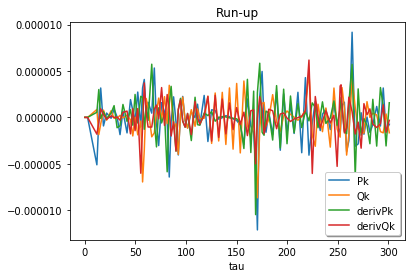

In [62]:
taut = numpy.linspace(0,10,301) #a solution 101 evenly spaced samples in the interval 0 <= t <= 10
#print(sol.y)
#print(sol.t)
#
soly=sol.y
plt.plot(sol.t,soly.T)
plt.xlabel("tau")
plt.legend(["Pk","Qk","derivPk","derivQk"],shadow=True)
plt.title("Run-up")
plt.show()

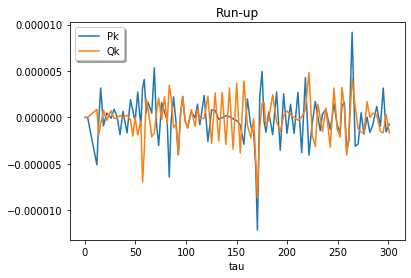

In [63]:
plt.plot(sol.t,soly[0:2].T)
plt.xlabel("tau")
plt.legend(["Pk","Qk"],shadow=True)
plt.title("Run-up")
plt.show()

In [66]:
# T = tau/tauC, Pkk = PK/pkkC, Qkk = QK/qkkC
# Derivative(qk(tau),tau) = Derivative(qk,T)*Derivative(T,tau) = Derivative(qk,T)*(1/tauC)
# DerivPK = derivPK / tauC
# derivPK = Derivative(pk(T),T)

# dydt = [PK, QK, solucdiff2pp, solucdiff2qq]

tau = symbols('tau') 
T, tauC, derivPK, derivQK, Pkk, Qkk = symbols('T, tauC, derivPK, derivQK, Pkk, Qkk')
dydt = [PK.subs({DerivPK: derivPK/tauC, DerivQK: derivQK, tau: tauC*T}), 
        QK.subs({DerivPK: derivPK/tauC, DerivQK: derivQK, tau: tauC*T}),
        solucdiff2pp.subs({DerivPK: derivPK/tauC, DerivQK: derivQK, tau: tauC*T, Pkk: PK/pkkC, Qkk: QK/qkkC}), 
        solucdiff2qq.subs({DerivPK: derivPK/tauC, DerivQK: derivQK, tau: tauC*T, Pkk: PK/pkkC, Qkk: QK/qkkC})]


In [67]:
dydt

[PK,
 QK,
 -4.40394214140636e-14*PK**7/(6.30886699014073e-14*PK**6 + 1.62331557071147e-13*PK**4*QK**2 + 1.62331557071147e-13*PK**2*QK**4 + 6.30886699014073e-14*QK**6) - 1.9745174838745e-14*PK**6*derivPK/(tauC*(6.30886699014073e-14*PK**6 + 1.62331557071147e-13*PK**4*QK**2 + 1.62331557071147e-13*PK**2*QK**4 + 6.30886699014073e-14*QK**6)) - 3.30285402329198e-22*PK**6*sin(T*tauC)/(6.30886699014073e-14*PK**6 + 1.62331557071147e-13*PK**4*QK**2 + 1.62331557071147e-13*PK**2*QK**4 + 6.30886699014073e-14*QK**6) - 1.00983851491227e-13*PK**5*QK**2/(6.30886699014073e-14*PK**6 + 1.62331557071147e-13*PK**4*QK**2 + 1.62331557071147e-13*PK**2*QK**4 + 6.30886699014073e-14*QK**6) + 1.25013666918239e-14*PK**5*QK*derivQK/(6.30886699014073e-14*PK**6 + 1.62331557071147e-13*PK**4*QK**2 + 1.62331557071147e-13*PK**2*QK**4 + 6.30886699014073e-14*QK**6) + 2.09115338871131e-22*PK**5*QK*cos(T*tauC)/(6.30886699014073e-14*PK**6 + 1.62331557071147e-13*PK**4*QK**2 + 1.62331557071147e-13*PK**2*QK**4 + 6.30886699014073e-

constantes
n, k : nondimensional
tau : [s]


ms=0.0000261725 # []
mT = 5.0750952130962986 *10**(-6) # []
cs=1.94991*10**8
Ds = 0.06###; (*0.005 Dämpfungsmaß des Stators*)
#d = 2 *sqrt(msT* cs *Ds) = 38.2402923781611
rhor = 2700  # [N/m²] ###(*Aluminum*)
####(*viga mola*
EE = 206000###; (*Nmm^2*)
EE = EE*10**6
B = 0.0025 ##;(*largura*)
t = 0.0005  ###; (*espessura*)
l = 0.02   ###; (*comprimento*)
Ib = (B*t**3)/12
#cr ####(*0;4000;*) (*elasticidade da viga mola*)
rout = 0.003124764129949177
rin = 0.002224764129949177
Rr = rout
Hr = 0.001 ###(*0.003*)

r1 = 0.001
mr = float(pi) * rhor *Rr**2 *Hr - float(pi) * rhor *r1**2 *Hr ### (*6.4 10 -4 ;*)
Ha = 0.0005
ma = float(pi) *rhor * Ha*(rout**2 - rin**2)


solucdiff2pp =(soluDIFF2PP.subs({Ir: mr*(Rr**2 + r1**2)/2 + ma*(rout**2+ rin**2)/2, 
                                 Psi_theta_theta: 226.536, Uu: -0.377673, 
                  h: 0.0012, Rk: 0.0027, msT: ms + mT, hT: 0.0015,
                  Vo: 100, cUo: 0.0174596, d: 38.2402923781611, ps: 0.5*10**(-3), mR: mr + ma, 
                  cr: (3 *EE *Ib)/l**3, omega: 2.72951*10**6, Texte: 0.1*10**(-3), n: 4, k: 2}) ).expand()

Ir = [kg m²]
Psi_theta_theta =
Uu = 
h = [m]   #stator thickness
Rk = [m] #contact point/radius (2,4)
msT = [kg]
hT = [m]
Vo = [V]
cUo = [
d = 
ps = [m]
mR = [kg]
cr = [N/m²]*[m⁴]/[m³]=[N/m]
omega = [1/s]
Texte = [Nm]

PI teorem
